In [3]:
import sys
from pathlib import Path
SRC_ROOT = "../src"
if str(SRC_ROOT) not in sys.path:
    sys.path.insert(0, str(SRC_ROOT))

In [4]:
from twc.twc_io import mcc_obs_encoder
from twc.twc_builder import build_twc, TWC
import gymnasium as gym
import torch
import numpy as np

In [5]:
env = gym.make("MountainCarContinuous-v0")
env.observation_space

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)

In [13]:
samples = 10
np_synth_obs = [np.linspace(-1.2,-0.7,samples), np.linspace(0.6, 0.07,samples)] # position, velocity
print("Synthetic observations:", np_synth_obs)

Synthetic observations: [array([-1.2       , -1.14444444, -1.08888889, -1.03333333, -0.97777778,
       -0.92222222, -0.86666667, -0.81111111, -0.75555556, -0.7       ]), array([0.6       , 0.54111111, 0.48222222, 0.42333333, 0.36444444,
       0.30555556, 0.24666667, 0.18777778, 0.12888889, 0.07      ])]


In [14]:
torch_obs = torch.as_tensor(np.array(np_synth_obs)).T.float()
print("Torch observations:", torch_obs.shape)

Torch observations: torch.Size([10, 2])


In [15]:
ex_obs, in_obs = mcc_obs_encoder(torch_obs)
print(ex_obs)
print(in_obs)

tensor([[  0.0000, -10.0000,   0.0000, 110.0000],
        [  0.0000, -10.0000,   0.0000,  98.2222],
        [  0.0000, -10.0000,   0.0000,  86.4444],
        [  0.0000, -10.0000,   0.0000,  74.6667],
        [  0.0000, -10.0000,   0.0000,  62.8889],
        [  0.0000, -10.0000,   0.0000,  51.1111],
        [  0.0000, -10.0000,   0.0000,  39.3333],
        [  0.0000, -10.0000,   0.0000,  27.5556],
        [  0.0000, -10.0000,   0.0000,  15.7778],
        [  0.0000, -10.0000,   0.0000,   4.0000]])
tensor([[-10.0000,   0.0000,  10.0000,   0.0000],
        [-10.0000,   0.0000,   9.0741,   0.0000],
        [-10.0000,   0.0000,   8.1481,   0.0000],
        [-10.0000,   0.0000,   7.2222,   0.0000],
        [-10.0000,   0.0000,   6.2963,   0.0000],
        [-10.0000,   0.0000,   5.3704,   0.0000],
        [-10.0000,   0.0000,   4.4444,   0.0000],
        [-10.0000,   0.0000,   3.5185,   0.0000],
        [-10.0000,   0.0000,   2.5926,   0.0000],
        [-10.0000,   0.0000,   1.6667,   0.0000]]

TypeError: tuple indices must be integers or slices, not tuple

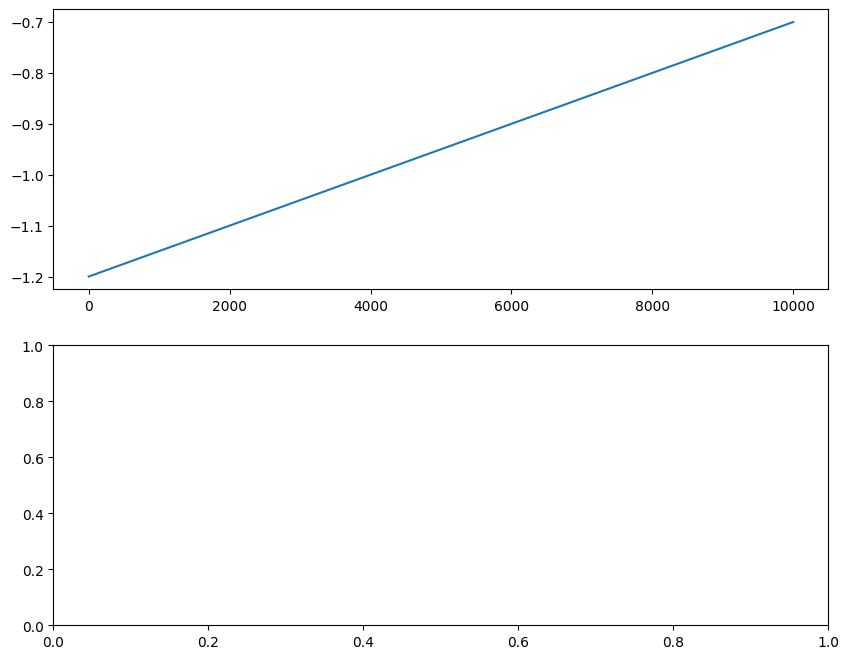

In [9]:
# plot torch_obs vs encoded_obs, original pos vs encoded pos and original vel vs encoded vel
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(torch_obs[:, 0].numpy(), label='Original Position')
axs[0].plot(encoded_obs[:, 0].detach().numpy(), label='Encoded Position')
axs[0].set_title('Position: Original vs Encoded')
axs[0].legend()
plt.tight_layout()
plt.show()